In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import mplcursors ##use for hovering purpose
df=pd.read_csv('Customer Churn.csv') ##dataset must be present in your directory
df.head() ##only first 5 rows

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [49]:
df.tail()  ##last 5 rows

customerID  gender SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male            no     Yes        Yes      24   
7039  2234-XADUH  Female            no     Yes        Yes      72   
7040  4801-JZAZL  Female            no     Yes        Yes      11   
7041  8361-LTMKD    Male            no     Yes         No       4   
7042  3186-AJIEK    Male            no      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[5 rows x 21 columns]

In [ ]:
df.shape ## number of rows and columns

(7043, 21)

In [ ]:
df.info() ##all information about data columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges']=df['TotalCharges'].replace(" ",0) ##replace blank with 0
df['TotalCharges']=df['TotalCharges'].astype('float') ##change type of TotalCharges as float we can pass it as int as well.

#replacing blanks with 0 as tenure is 0 and no total charges are recorded 

In [53]:
df['TotalCharges'].head()  ##print top 5 of this columns rows

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [ ]:
df['TotalCharges'].isnull().sum() ##no null is this dataframe


0

In [12]:
df.duplicated().sum() ##check dublicates

0

In [ ]:
df.describe() ##give all statistics of numerbers data

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [ ]:
df.isnull().sum().sum() ##check nulls

0

In [ ]:
df["customerID"].duplicated().sum() ##check dublicates in customerID column 

0

In [60]:
def conv(val):  ##Apply function
    if val==1:
        return True
    else:
        return False
 
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)


In [64]:
df['SeniorCitizen'].tail(10) ##after applying function  last 10 rows

7033    False
7034    False
7035    False
7036    False
7037    False
7038    False
7039    False
7040    False
7041    False
7042    False
Name: SeniorCitizen, dtype: bool

In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

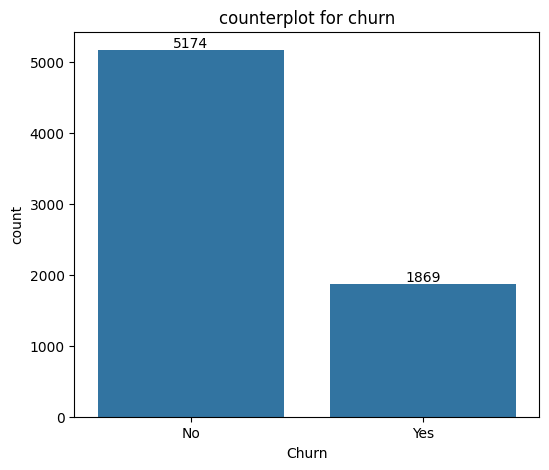

In [ ]:
##Churn Distribution
plt.figure(figsize=(6,5))
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title('counterplot for churn')
plt.show()

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

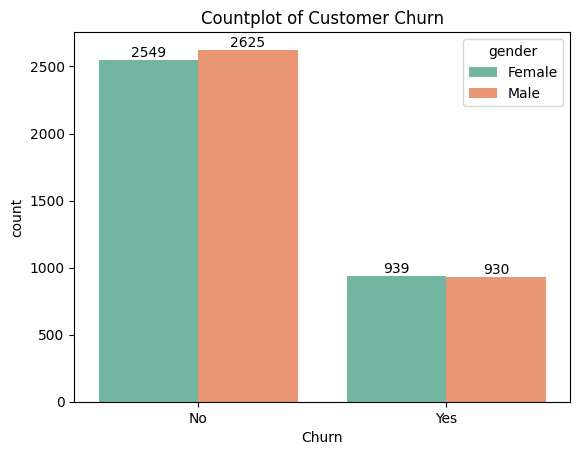

In [ ]:
# Countplot of Customer Churn by gender
ax = sns.countplot(x='Churn', hue='gender', data=df,palette='Set2')

# Adding labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Adding a title to the plot
plt.title("Countplot of Customer Churn")

# Display the plot
plt.show()


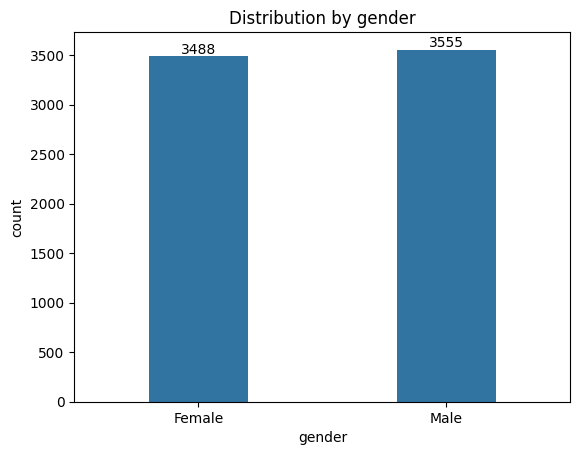

In [ ]:
##Distribution by gender
ax=sns.countplot(x='gender',data=df,width=0.4) # palette is for color and width is for width of our data to remove warning remove palette from here
ax.bar_label(ax.containers[0])
plt.title("Distribution by gender")
plt.show()

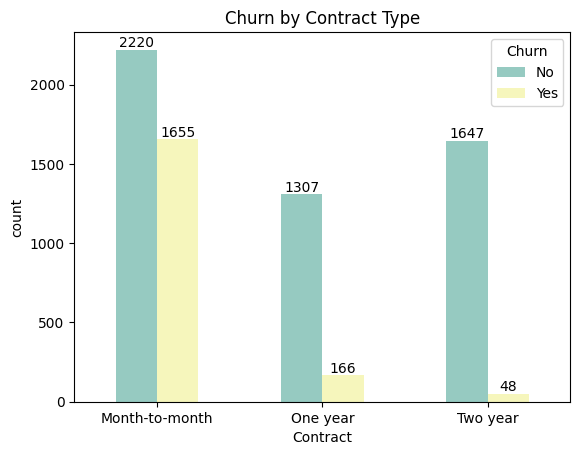

In [4]:
##Churn by Contract Type
ax=sns.countplot(x='Contract',hue='Churn', data=df,width=0.5,palette="Set3")
for container in ax.containers:
   ax.bar_label(container)
plt.title('Churn by Contract Type')
plt.show()

In [13]:
##Contract Over tenure
plt.Figure(figsize=(5,6))
ax=sns.lineplot(x="tenure",y="Contract",hue='Churn',data=df)
plt.xlabel('tenure')
plt.ylabel('Contract')
plt.title("Contract Over tenure line plot")
plt.show()

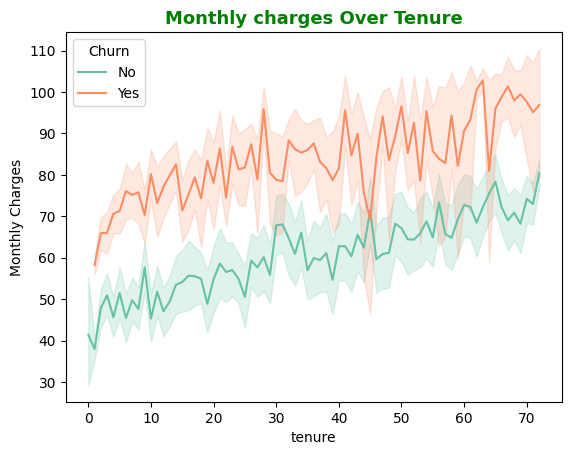

In [ ]:
## Monthly charges Over Tenure
plt.Figure(figsize=(5,6))
ax=sns.lineplot(x="tenure",y="MonthlyCharges",hue="Churn",data=df,palette='Set2') ##hue is act like legend here
mplcursors.cursor(ax, hover=True) ##like tooltip in powerBI when hover it gives us value.
plt.xlabel('tenure')
plt.ylabel('Monthly Charges')
plt.title('Monthly charges Over Tenure',color='green',fontsize=13,fontweight='bold')## font parameters.
plt.show()

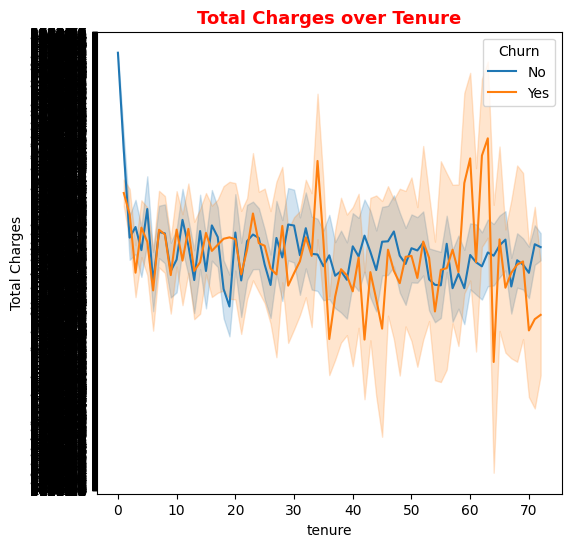

In [41]:
##total charges over Tenure
plt.figure(figsize=(6, 6))
ax=sns.lineplot(x="tenure", y="TotalCharges", hue="Churn", data=df)
plt.xlabel('tenure')
plt.ylabel('Total Charges')
plt.title('Total Charges over Tenure',fontsize=13,color='red',fontweight='bold')

plt.show()

In [38]:
dark_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create an interactive bar plot with custom dark colors
fig = px.bar(df, x='Churn', y='TotalCharges', color='Contract', 
             title='Churn by Contract', 
             labels={'TotalCharges': 'TotalCharges'},
             hover_data=['TotalCharges'],
             color_discrete_sequence=dark_colors)

# Show the plot
fig.show()

In [39]:
# Define a custom dark color palette
dark_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create an interactive bar plot with custom dark colors
fig = px.bar(df, x='Churn', y='TotalCharges', color='Contract', 
             title='Churn by Contract', 
             labels={'TotalCharges': 'TotalCharges'},
             hover_data=['TotalCharges'],
             color_discrete_sequence=dark_colors)

# Update the layout to have a dark background
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

# Show the plot
fig.show()

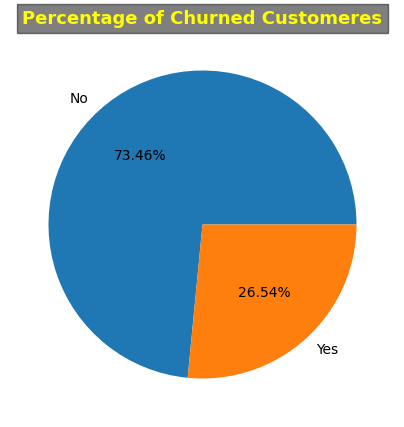

In [ ]:
##prcenatge of Churned Customers.
plt.figure(figsize = (5,5))
##gb = df.groupby("Churn").agg({'Churn':"count"})
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")##here autopect gives you percentage
plt.title("Percentage of Churned Customeres", fontsize = 13,color="yellow",fontweight='bold',bbox=dict(facecolor='black', alpha=0.5))
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out. 
#not let's explore the reason behind it

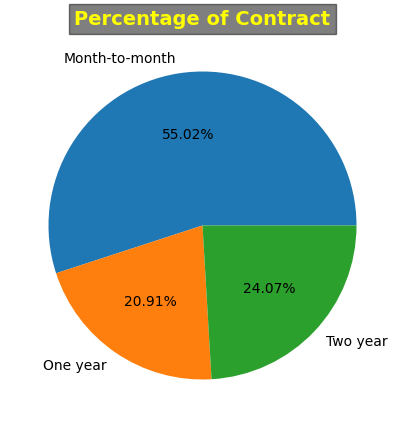

In [11]:
##prcenatge of Churned Customers.
plt.figure(figsize = (5,5))
##gb = df.groupby("Churn").agg({'Churn':"count"})
gb=df.groupby("Contract").agg({'Contract':"count"})
plt.pie(gb['Contract'], labels = gb.index, autopct = "%1.2f%%")##here autopect gives you percentage
plt.title("Percentage of Contract", fontsize = 14,color="yellow",fontweight='bold',bbox=dict(facecolor='black', alpha=0.5))
plt.show()

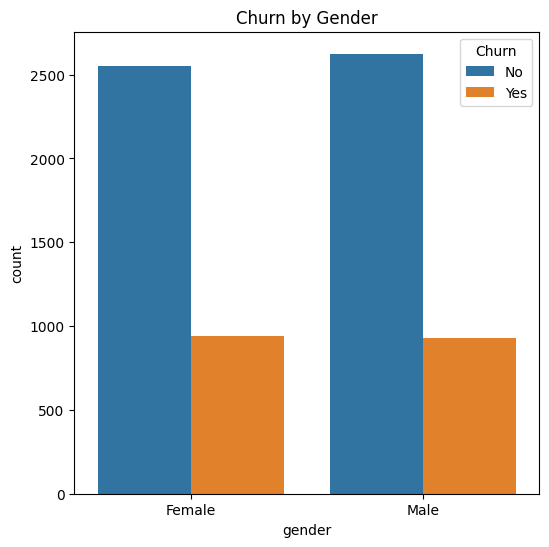

In [12]:
plt.figure(figsize = (6,6))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

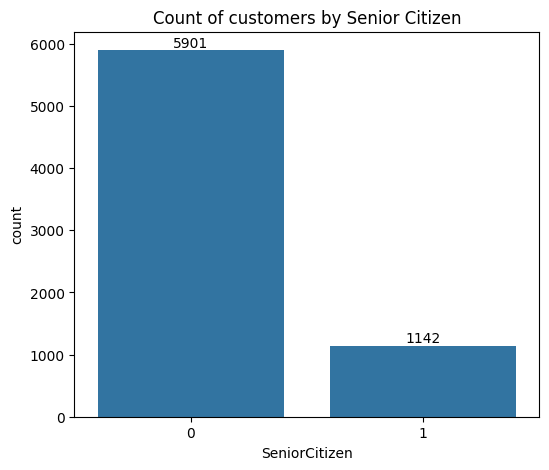

In [18]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x='SeniorCitizen',data=df)
plt.bar_label(ax.containers[0])
plt.title("Count of customers by Senior Citizen")
plt.show()

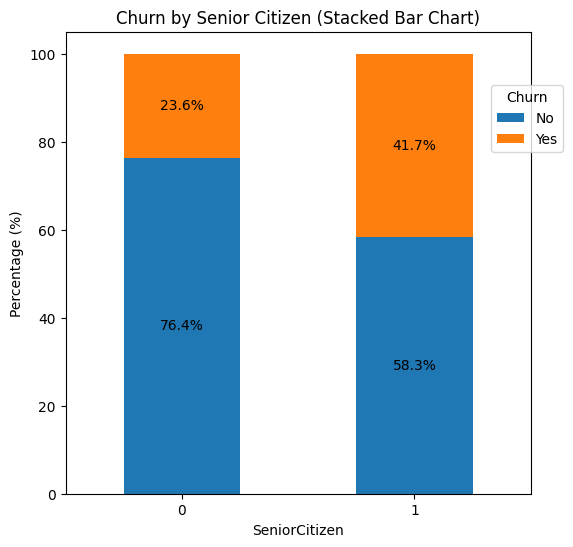

In [19]:
##Stacked column chart
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100
#This line groups the DataFrame df by the SeniorCitizen column and calculates the normalized value counts of the Churn column within each group.
#The normalize=True parameter converts the counts to percentages.
#The unstack() method reshapes the result into a DataFrame where the Churn values become columns.
#Multiplying by 100 converts the proportions to percentages.

# Plot
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

#comparative a greater pecentage of people in senior citizen category have churned

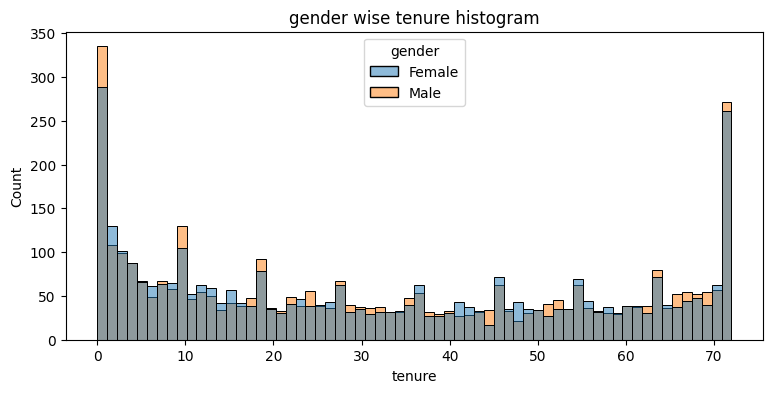

In [23]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 64, hue = "gender")
plt.title("gender wise tenure histogram")
plt.show()

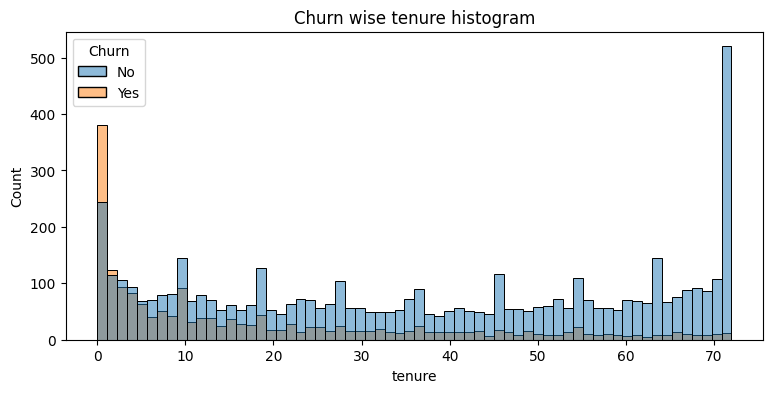

In [25]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 64, hue = "Churn")
plt.title("Churn wise tenure histogram")
plt.show()

#people who have used our services for a long time have stayed and people who have used our sevices 
#1 or 2 months  have churned

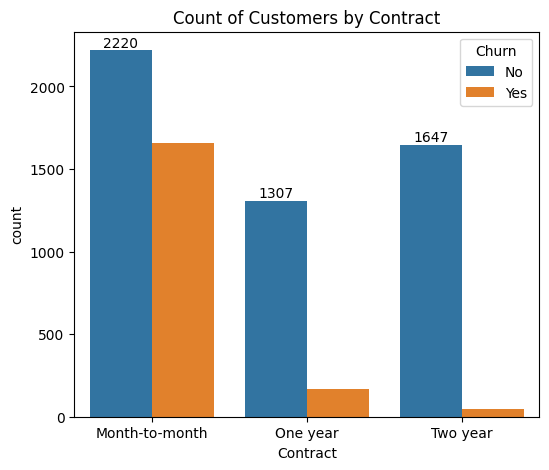

In [26]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

In [ ]:
#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 

In [76]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

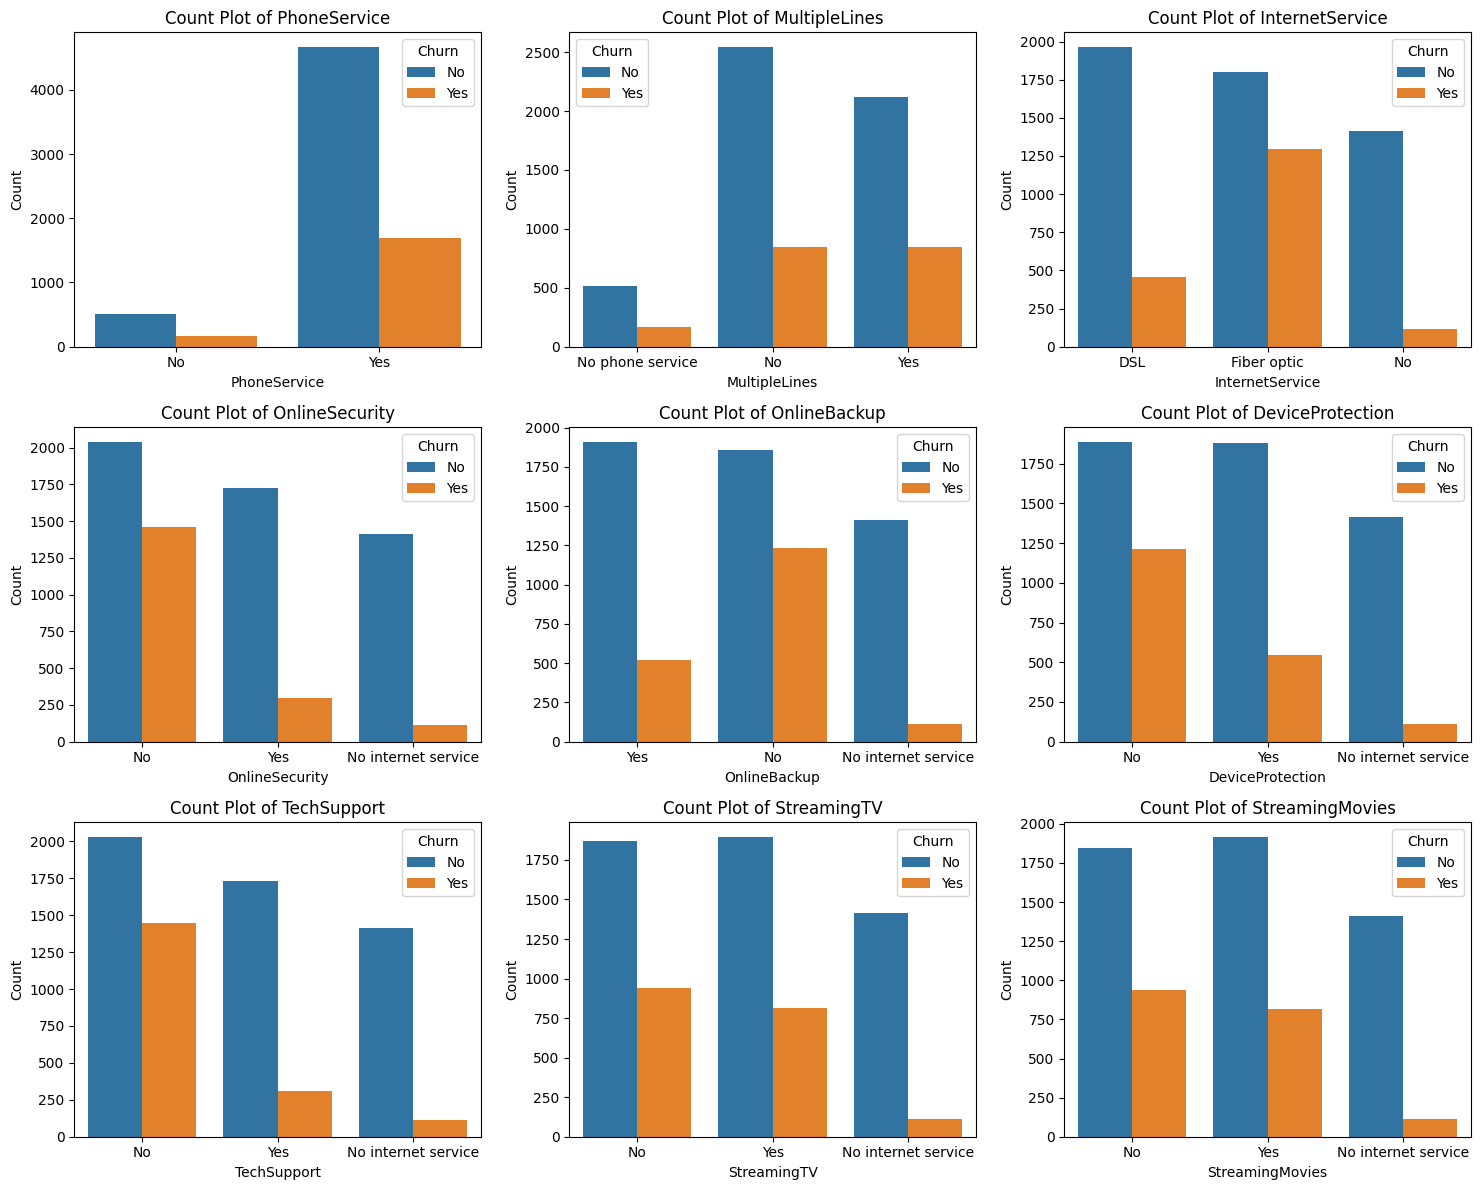

In [83]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. 

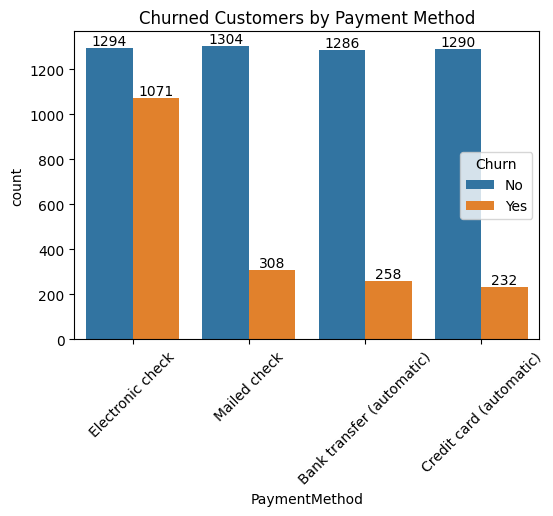

In [90]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method. 